In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist
import os

## CLUSTERS SENSORES

https://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities

In [106]:
np.random.seed(15)
movimientos=np.random.randint(19,size=6)
personas=np.random.randint(1,9,size=6)
path="/Users/rociocuestapedraz/Desktop/data/"
columns=['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro','T_ygyro','T_zgyro' ,'T_xmag' ,'T_ymag', 'T_zmag']

df=pd.DataFrame(columns=columns)
dirs=['a09', 'a13', 'a06', 'a01', 'a08', 'a12']
print(dirs)

for i,c in enumerate(dirs) :
    rel_path=path+c+'/'
    
    rel_path+=os.listdir(rel_path)[1]+'/'
    for seg in os.listdir(rel_path):
        df_temp=pd.read_csv(rel_path+seg,names=columns,usecols=range(9)).iloc[:,:9]
        df=pd.concat([df,df_temp],axis=0)

['a09', 'a13', 'a06', 'a01', 'a08', 'a12']


In [83]:
df.head()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag
0,9.1313,-0.040538,3.4606,-0.15363,-0.066777,-0.075730,-0.97406,0.050221,0.23750
1,9.2139,0.077553,3.4023,-0.16806,-0.041336,-0.057610,-0.97469,0.045937,0.24056
2,8.7879,0.020093,3.8090,-0.17538,-0.058453,-0.068514,-0.97172,0.038415,0.24403
3,8.8867,0.081196,3.1462,-0.15202,-0.101650,-0.057374,-0.97200,0.035554,0.24616
4,9.3918,0.030489,3.7017,-0.11383,-0.085117,-0.096532,-0.96827,0.032824,0.25162


In [84]:
#Normalizo los df_num
from sklearn.preprocessing import MinMaxScaler
df2 = MinMaxScaler().fit_transform(df)
df2 = pd.DataFrame(df2, columns = df.columns)
df2.head()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag
0,0.235236,0.565772,0.352413,0.625413,0.679081,0.482128,0.319662,0.522254,0.834018
1,0.236255,0.568237,0.351919,0.624868,0.680191,0.484507,0.319115,0.519381,0.836047
2,0.231000,0.567037,0.355366,0.624592,0.679444,0.483075,0.321693,0.514337,0.838347
3,0.232218,0.568313,0.349748,0.625474,0.677558,0.484538,0.321450,0.512419,0.839759
4,0.238450,0.567254,0.354456,0.626916,0.678280,0.479397,0.324687,0.510588,0.843378


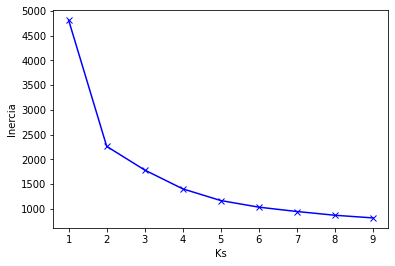

In [85]:
X=np.array(df2)
inercias = [] 
  
for k in range(1,10): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_)

plt.plot(range(1,10), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [64]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
df2["clase"]=kmeans.labels_

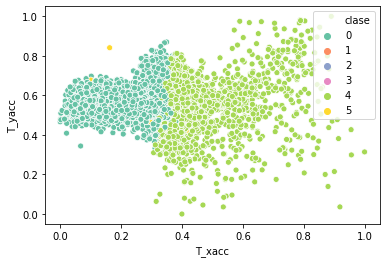

In [65]:
sns.scatterplot(df2['T_xacc'], df2['T_yacc'], hue = df2["clase"], palette="Set2")

In [66]:
df2["clase"].value_counts()

1    12089
5    11437
2     8555
0     5979
3     5463
4     1477
Name: clase, dtype: int64

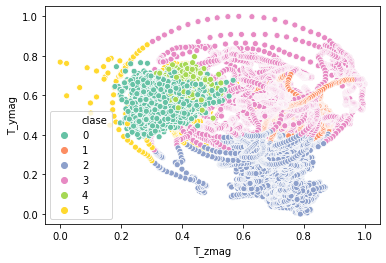

In [67]:
sns.scatterplot(df2['T_zmag'], df2['T_ymag'], hue = df2["clase"], palette="Set2")

In [68]:
df['labels']=kmeans.labels_
for i in range(0,45000,7500):
    print(df.iloc[i:i+7500]['labels'].value_counts(normalize='true'))

5    0.5
1    0.5
Name: labels, dtype: float64
5    0.998667
0    0.001333
Name: labels, dtype: float64
2    0.9992
1    0.0008
Name: labels, dtype: float64
1    1.0
Name: labels, dtype: float64
3    0.728400
2    0.141467
1    0.111067
5    0.019067
Name: labels, dtype: float64
0    0.795867
4    0.196933
5    0.007200
Name: labels, dtype: float64


In [18]:
#y=[]
#for i,mov in enumerate(dirs):
    #clase=np.zeros(7500)
    #clase.fill(i)
    #y.extend(clase)

In [70]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Agrupar 125 filas y pasarlo a columnas

In [107]:
columns_transp=[]
for i in range(125):
    columns_transp.extend(map(lambda x: x+str(i),columns))

In [108]:
arr_rows=[]
for i in range(0,len(df),125):
    arr_rows.append(df.iloc[i:i+125].values.flatten())
df_t=pd.DataFrame(data=arr_rows,columns=columns_transp)

In [109]:
df2 = MinMaxScaler().fit_transform(df_t)
df2 = pd.DataFrame(df2, columns = df_t.columns)
df2.head()

,T_xacc0,T_yacc0,T_zacc0,T_xgyro0,T_ygyro0,T_zgyro0,T_xmag0,T_ymag0,T_zmag0,T_xacc1,...,T_zmag123,T_xacc124,T_yacc124,T_zacc124,T_xgyro124,T_ygyro124,T_zgyro124,T_xmag124,T_ymag124,T_zmag124
0,0.277118,0.456295,0.372139,0.680245,0.553437,0.349732,0.267646,0.591308,0.804925,0.268230,...,0.798887,0.419655,0.384781,0.313636,0.593447,0.395075,0.470678,0.276398,0.596270,0.794496
1,0.297538,0.392998,0.342460,0.724933,0.558394,0.382461,0.268527,0.592705,0.789123,0.285685,...,0.831011,0.362836,0.550362,0.349594,0.602918,0.318261,0.352776,0.311196,0.502372,0.839783
2,0.277388,0.470526,0.365295,0.694038,0.540899,0.322538,0.305571,0.487126,0.840027,0.282230,...,0.816711,0.492337,0.540164,0.368116,0.572328,0.385761,0.390516,0.282512,0.604892,0.817327
3,0.345275,0.415880,0.373161,0.648758,0.619513,0.370696,0.272079,0.593585,0.805646,0.281297,...,0.859592,0.495050,0.579627,0.352801,0.655071,0.369816,0.364749,0.300223,0.552028,0.862094
4,0.316999,0.514716,0.325284,0.738151,0.592490,0.321616,0.288585,0.544389,0.851954,0.280033,...,0.811511,0.429149,0.541220,0.335693,0.602906,0.345068,0.424946,0.284820,0.570898,0.816065


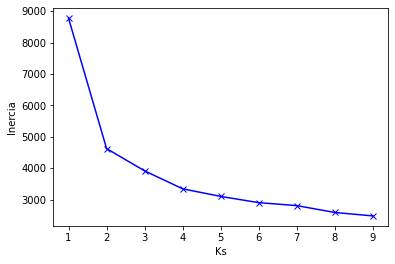

In [110]:
X=np.array(df2)
inercias = [] 
  
for k in range(1,10): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_)

plt.plot(range(1,10), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [97]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
df_t["clase"]=kmeans.labels_

In [98]:
for i in range(0,360,60):
    print(df_t.iloc[i:i+60]['clase'].value_counts(normalize='true'))

3    0.5
1    0.5
Name: clase, dtype: float64
1    1.0
Name: clase, dtype: float64
0    1.0
Name: clase, dtype: float64
3    1.0
Name: clase, dtype: float64
5    0.866667
3    0.066667
0    0.066667
Name: clase, dtype: float64
1    0.416667
4    0.316667
2    0.266667
Name: clase, dtype: float64


In [112]:
y=[]
for i,mov in enumerate(dirs):
    clase=np.zeros(60)
    clase.fill(i)
    y.extend(clase)
df2["clase"]=y

In [113]:
metrics.adjusted_rand_score(y,kmeans.labels_)

0.6466587340061404

In [114]:
df2.head()

,T_xacc0,T_yacc0,T_zacc0,T_xgyro0,T_ygyro0,T_zgyro0,T_xmag0,T_ymag0,T_zmag0,T_xacc1,...,T_xacc124,T_yacc124,T_zacc124,T_xgyro124,T_ygyro124,T_zgyro124,T_xmag124,T_ymag124,T_zmag124,clase
0,0.277118,0.456295,0.372139,0.680245,0.553437,0.349732,0.267646,0.591308,0.804925,0.268230,...,0.419655,0.384781,0.313636,0.593447,0.395075,0.470678,0.276398,0.596270,0.794496,0.0
1,0.297538,0.392998,0.342460,0.724933,0.558394,0.382461,0.268527,0.592705,0.789123,0.285685,...,0.362836,0.550362,0.349594,0.602918,0.318261,0.352776,0.311196,0.502372,0.839783,0.0
2,0.277388,0.470526,0.365295,0.694038,0.540899,0.322538,0.305571,0.487126,0.840027,0.282230,...,0.492337,0.540164,0.368116,0.572328,0.385761,0.390516,0.282512,0.604892,0.817327,0.0
3,0.345275,0.415880,0.373161,0.648758,0.619513,0.370696,0.272079,0.593585,0.805646,0.281297,...,0.495050,0.579627,0.352801,0.655071,0.369816,0.364749,0.300223,0.552028,0.862094,0.0
4,0.316999,0.514716,0.325284,0.738151,0.592490,0.321616,0.288585,0.544389,0.851954,0.280033,...,0.429149,0.541220,0.335693,0.602906,0.345068,0.424946,0.284820,0.570898,0.816065,0.0


Agrupar por personas, 60 filas corresponde a una persona

In [4]:
df1=pd.DataFrame()
df2=pd.DataFrame()
for j in range(1,9):
    for i in range(1,10):
        dfa=pd.read_csv(f"/Users/rociocuestapedraz/Desktop/data/a01/p{j}/s0{i}.txt",header=None)
        df1=pd.concat([df1,dfa],axis=0)
    for i in range(10,61):
        dfb=pd.read_csv(f"/Users/rociocuestapedraz/Desktop/data/a01/p{j}/s{i}.txt",header=None)
        df2=pd.concat([df2,dfb],axis=0)

    
df=pd.concat([df1,df2],axis=0)

In [6]:
df.shape

(60000, 45)

In [18]:
y = [0]*7500+[1]* 7500 +[2]* 7500 +[3]* 7500 +[4]* 7500 +[5]* 7500+[6]* 7500+[7]* 7500

In [26]:
X=np.array(df)
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,kmeans.labels_)

0.5028386709855119

### Clustering Jerarquico:

**Una actividad, 8 personas**

In [ ]:
/Users/rociocuestapedraz/Desktop/data

In [6]:
#/Users/rociocuestapedraz/Desktop/data/a01/p1/s01.txt
lista_segmentos = range(1,61)
lista_personas = range(1,9)
df = pd.DataFrame()
#/Users/rociocuestapedraz/Desktop/data/a01/p
lista_path = []
for i in lista_personas:
        for j in lista_segmentos:
            if j < 10:
                path = r"/Users/rociocuestapedraz/Desktop/data/a01/p"+str(i)+"/s0"+str(j)+".txt"
                lista_path.append(path)
                df1 = pd.read_csv(path, names = range(45))
                df1 = df1.iloc[:,:9]
                df1 = df1.to_numpy().flatten()
                df1 = pd.DataFrame(df1).T
                df = df.append(df1)
            else:
                path = r"/Users/rociocuestapedraz/Desktop/data/a01/p"+str(i)+"/s"+str(j)+".txt"
                lista_path.append(path)
                df1 = pd.read_csv(path, names = range(45))
                df1 = df1.iloc[:,:9]
                df1 = df1.to_numpy().flatten()
                df1 = pd.DataFrame(df1).T
                df = df.append(df1)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,8.1305,...,0.13478,7.9812,1.0945,5.6005,-0.005819,0.016371,0.002868,-0.79209,-0.070456,0.13423
0,7.9665,1.1684,5.6755,-0.005730,0.026995,-0.009029,-0.79062,-0.071635,0.13429,7.9516,...,0.12762,7.8991,1.1389,5.7204,0.003239,0.021752,0.000058,-0.79384,-0.070314,0.12694
0,7.8917,1.1390,5.6980,0.014180,0.028722,-0.009079,-0.79531,-0.069460,0.12447,7.9065,...,0.13108,7.9588,1.1239,5.6168,0.006900,0.028915,-0.000911,-0.79375,-0.071949,0.13380
0,7.9366,1.1536,5.6318,0.003242,0.029965,0.009111,-0.79292,-0.070358,0.13194,7.9665,...,0.12063,7.8090,1.2047,6.0569,-0.003188,0.003819,-0.016342,-0.79537,-0.072348,0.11873
0,7.8913,1.1972,5.9082,-0.044333,-0.067467,-0.004235,-0.79592,-0.073174,0.12086,7.8696,...,0.14448,8.0486,1.1383,5.4544,-0.009570,-0.010470,-0.010857,-0.79026,-0.071108,0.14722


In [17]:
df.shape

(480, 1125)

In [11]:
from sklearn.cluster import AgglomerativeClustering
X=np.array(df)
agglom = AgglomerativeClustering(n_clusters =8, linkage = 'single')
agglom.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=8)

In [12]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(X,X) 
print(dist_matrix)

[[ 0.          3.97985596  3.52464618 ... 19.05253542 18.87865882
  18.65500262]
 [ 3.97985596  0.          1.86951726 ... 19.58073534 19.42500702
  19.19181691]
 [ 3.52464618  1.86951726  0.         ... 19.49062608 19.32975615
  19.1009221 ]
 ...
 [19.05253542 19.58073534 19.49062608 ...  0.          0.92662666
   1.01969419]
 [18.87865882 19.42500702 19.32975615 ...  0.92662666  0.
   0.95600835]
 [18.65500262 19.19181691 19.1009221  ...  1.01969419  0.95600835
   0.        ]]


In [15]:
from scipy.cluster import hierarchy 
Z = hierarchy.linkage(dist_matrix, 'single')

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


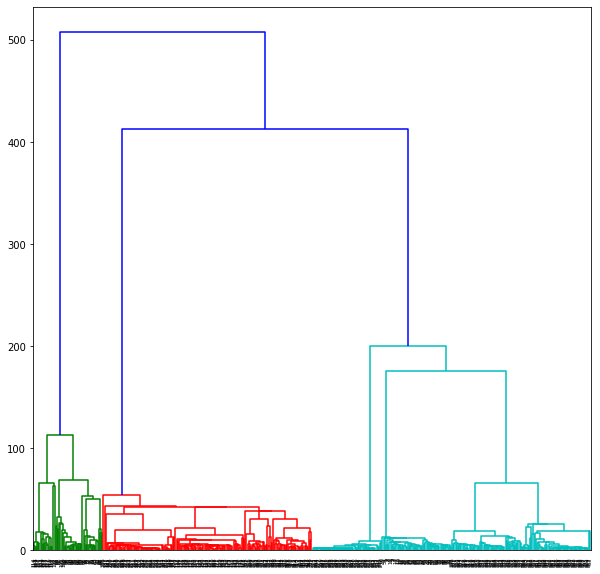

In [16]:
import pylab
pylab.figure(figsize=(10,10))
dendro = hierarchy.dendrogram(Z)

In [22]:
clase=0
filas= len(df)
y = list()
for fila in range(filas):
    y.append(clase)
    if fila%60 ==0 and fila>0:
        clase +=1

In [24]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,agglom.labels_)

0.5725255585310625

- 6 activ 1 persona 1 sensor 
- 1 actividad 8 persona 1 sensor
- todas las actividades, cluster por actividades para todas las personas
- todas las actividades todos los sensores
- diferenciar por sexo (No hacerlo mas)
- 8 personas 6 actividades y un sensor